<a href="https://colab.research.google.com/github/bhuvanabasapur/CMPE-257/blob/init/CMPE257_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
import pandas as pd
import random
f = "https://drive.google.com/file/d/1mxFo08tSSUXKACfJkyTlr90nE73cEClU/view?usp=sharing"
file = "/content/gdrive/MyDrive/Colab Notebooks/CMPE 257/Asteroid_Updated.csv"
n = sum(1 for line in open(file)) - 1 #number of records in file (excludes header)
s = 100000 #desired sample size
skip = sorted(random.sample(range(1,n+1),n-s)) #the 0-indexed header will not be included in the skip list
df = pd.read_csv(file, skiprows=skip)


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,10,16,23,24) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   name            2628 non-null    object 
 1   a               99999 non-null   float64
 2   e               100000 non-null  float64
 3   i               100000 non-null  float64
 4   om              100000 non-null  float64
 5   w               100000 non-null  float64
 6   q               100000 non-null  float64
 7   ad              99999 non-null   float64
 8   per_y           100000 non-null  float64
 9   data_arc        98144 non-null   float64
 10  condition_code  99886 non-null   object 
 11  n_obs_used      100000 non-null  int64  
 12  H               99648 non-null   float64
 13  neo             99999 non-null   object 
 14  pha             98030 non-null   object 
 15  diameter        16214 non-null   float64
 16  extent          2 non-null       object 
 17  albedo     

In [6]:
df.head(10)

,name,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,neo,pha,diameter,extent,albedo,rot_per,GM,BV,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
0,Irene,2.585567,0.166582,9.121646,86.122665,97.858985,2.154858,3.016277,4.157593,61526.0,0,2755,6.30,N,N,152.000,NaN,0.1590,15.0280,NaN,0.833,0.388,NaN,S,S,NaN,1.179660,MBA,0.237067,1518.560847,164.935853
1,Thalia,2.625683,0.234984,10.114258,66.846814,60.636814,2.008690,3.242677,4.254727,59343.0,0,2213,6.95,N,N,107.530,NaN,0.2536,12.3120,NaN,0.859,0.442,NaN,S,S,NaN,1.046330,MBA,0.231654,1554.039207,335.820192
2,Themis,3.136171,0.124743,0.751588,35.925899,106.957169,2.744957,3.527386,5.554026,60645.0,0,3662,7.08,N,N,198.000,NaN,0.0670,8.3740,NaN,0.684,0.336,NaN,B,C,0.19,1.758130,MBA,0.177462,2028.607815,355.207382
3,Fides,2.642283,0.175605,3.070811,7.269140,62.843445,2.178285,3.106282,4.295139,59923.0,0,2650,7.29,N,N,108.350,NaN,0.1826,7.3335,NaN,0.843,0.414,NaN,S,S,0.24,1.194420,MBA,0.229475,1568.799702,341.542548
4,Isis,2.441704,0.222823,8.514622,84.197334,237.305438,1.897635,2.985772,3.815466,59493.0,0,2754,7.53,N,N,110.997,NaN,0.1390,13.5900,NaN,0.874,0.462,NaN,L,S,NaN,0.899544,MBA,0.258324,1393.598982,203.414280
5,Mnemosyne,3.151209,0.113467,15.215090,199.200656,210.768781,2.793651,3.508767,5.594020,58312.0,0,2607,7.03,N,N,112.590,NaN,0.2149,12.4630,NaN,0.817,0.410,NaN,S,S,NaN,1.812220,MBA,0.176193,2043.215971,143.088652
6,Erato,3.135443,0.167732,2.233523,125.151511,276.391818,2.609529,3.661357,5.552091,41553.0,0,3106,8.76,N,N,106.921,NaN,0.0480,9.2213,NaN,0.708,0.378,NaN,Ch,BU,NaN,1.618610,MBA,0.177523,2027.901249,239.874721
7,Panopaea,2.615909,0.180426,11.594919,47.696286,255.389348,2.143931,3.087888,4.230992,55924.0,0,3141,8.11,N,N,127.911,NaN,0.0380,15.8052,NaN,0.740,0.390,NaN,Ch,C,0.14,1.163100,MBA,0.232954,1545.369901,70.446275
8,Galatea,2.783094,0.236437,4.070962,197.196851,174.305207,2.125068,3.441120,4.643014,56887.0,0,3006,8.66,N,N,118.710,NaN,0.0431,17.2680,NaN,0.686,0.320,NaN,C,C,NaN,1.124430,MBA,0.212282,1695.860791,274.909946
9,Minerva,2.756118,0.139082,8.556921,4.049793,274.811222,2.372792,3.139445,4.575674,54669.0,0,2407,7.90,N,N,154.155,NaN,0.0560,5.9820,NaN,0.685,0.315,NaN,C,CU,NaN,1.375300,MBA,0.215406,1671.264761,117.134832


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [8]:
def missing_percentage(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

def percent_value_counts(df, feature):
    percent = pd.DataFrame(round(df.loc[:,feature].value_counts(dropna=False, normalize=True)*100,2))
    total = pd.DataFrame(df.loc[:,feature].value_counts(dropna=False))
    total.columns = ["Total"]
    percent.columns = ['Percent']
    return pd.concat([total, percent], axis = 1)

In [9]:
missing_percentage(df)

,Total,Percent
GM,100000,100.00
IR,100000,100.00
extent,99998,100.00
G,99990,99.99
UB,99886,99.89
spec_T,99883,99.88
BV,99882,99.88
spec_B,99794,99.79
rot_per,97770,97.77
name,97372,97.37


## Data Wrangling

In [10]:
tooMuchNa = df.columns[df.isna().sum()/df.shape[0] > 0.80]
df = df.drop(tooMuchNa,axis=1)


In [11]:
missing_percentage(df)

,Total,Percent
pha,1970,1.97
moid,1970,1.97
data_arc,1856,1.86
H,352,0.35
condition_code,114,0.11
ma,4,0.00
neo,1,0.00
per,1,0.00
n,1,0.00
ad,1,0.00


In [12]:
df=df.dropna()

In [13]:
df.head(10)

,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,neo,pha,moid,class,n,per,ma
0,2.585567,0.166582,9.121646,86.122665,97.858985,2.154858,3.016277,4.157593,61526.0,0,2755,6.30,N,N,1.179660,MBA,0.237067,1518.560847,164.935853
1,2.625683,0.234984,10.114258,66.846814,60.636814,2.008690,3.242677,4.254727,59343.0,0,2213,6.95,N,N,1.046330,MBA,0.231654,1554.039207,335.820192
2,3.136171,0.124743,0.751588,35.925899,106.957169,2.744957,3.527386,5.554026,60645.0,0,3662,7.08,N,N,1.758130,MBA,0.177462,2028.607815,355.207382
3,2.642283,0.175605,3.070811,7.269140,62.843445,2.178285,3.106282,4.295139,59923.0,0,2650,7.29,N,N,1.194420,MBA,0.229475,1568.799702,341.542548
4,2.441704,0.222823,8.514622,84.197334,237.305438,1.897635,2.985772,3.815466,59493.0,0,2754,7.53,N,N,0.899544,MBA,0.258324,1393.598982,203.414280
5,3.151209,0.113467,15.215090,199.200656,210.768781,2.793651,3.508767,5.594020,58312.0,0,2607,7.03,N,N,1.812220,MBA,0.176193,2043.215971,143.088652
6,3.135443,0.167732,2.233523,125.151511,276.391818,2.609529,3.661357,5.552091,41553.0,0,3106,8.76,N,N,1.618610,MBA,0.177523,2027.901249,239.874721
7,2.615909,0.180426,11.594919,47.696286,255.389348,2.143931,3.087888,4.230992,55924.0,0,3141,8.11,N,N,1.163100,MBA,0.232954,1545.369901,70.446275
8,2.783094,0.236437,4.070962,197.196851,174.305207,2.125068,3.441120,4.643014,56887.0,0,3006,8.66,N,N,1.124430,MBA,0.212282,1695.860791,274.909946
9,2.756118,0.139082,8.556921,4.049793,274.811222,2.372792,3.139445,4.575674,54669.0,0,2407,7.90,N,N,1.375300,MBA,0.215406,1671.264761,117.134832


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97622 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   a               97622 non-null  float64
 1   e               97622 non-null  float64
 2   i               97622 non-null  float64
 3   om              97622 non-null  float64
 4   w               97622 non-null  float64
 5   q               97622 non-null  float64
 6   ad              97622 non-null  float64
 7   per_y           97622 non-null  float64
 8   data_arc        97622 non-null  float64
 9   condition_code  97622 non-null  object 
 10  n_obs_used      97622 non-null  int64  
 11  H               97622 non-null  float64
 12  neo             97622 non-null  object 
 13  pha             97622 non-null  object 
 14  moid            97622 non-null  float64
 15  class           97622 non-null  object 
 16  n               97622 non-null  float64
 17  per             97622 non-null 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5a44c2f8d0>,
      dtype=object)

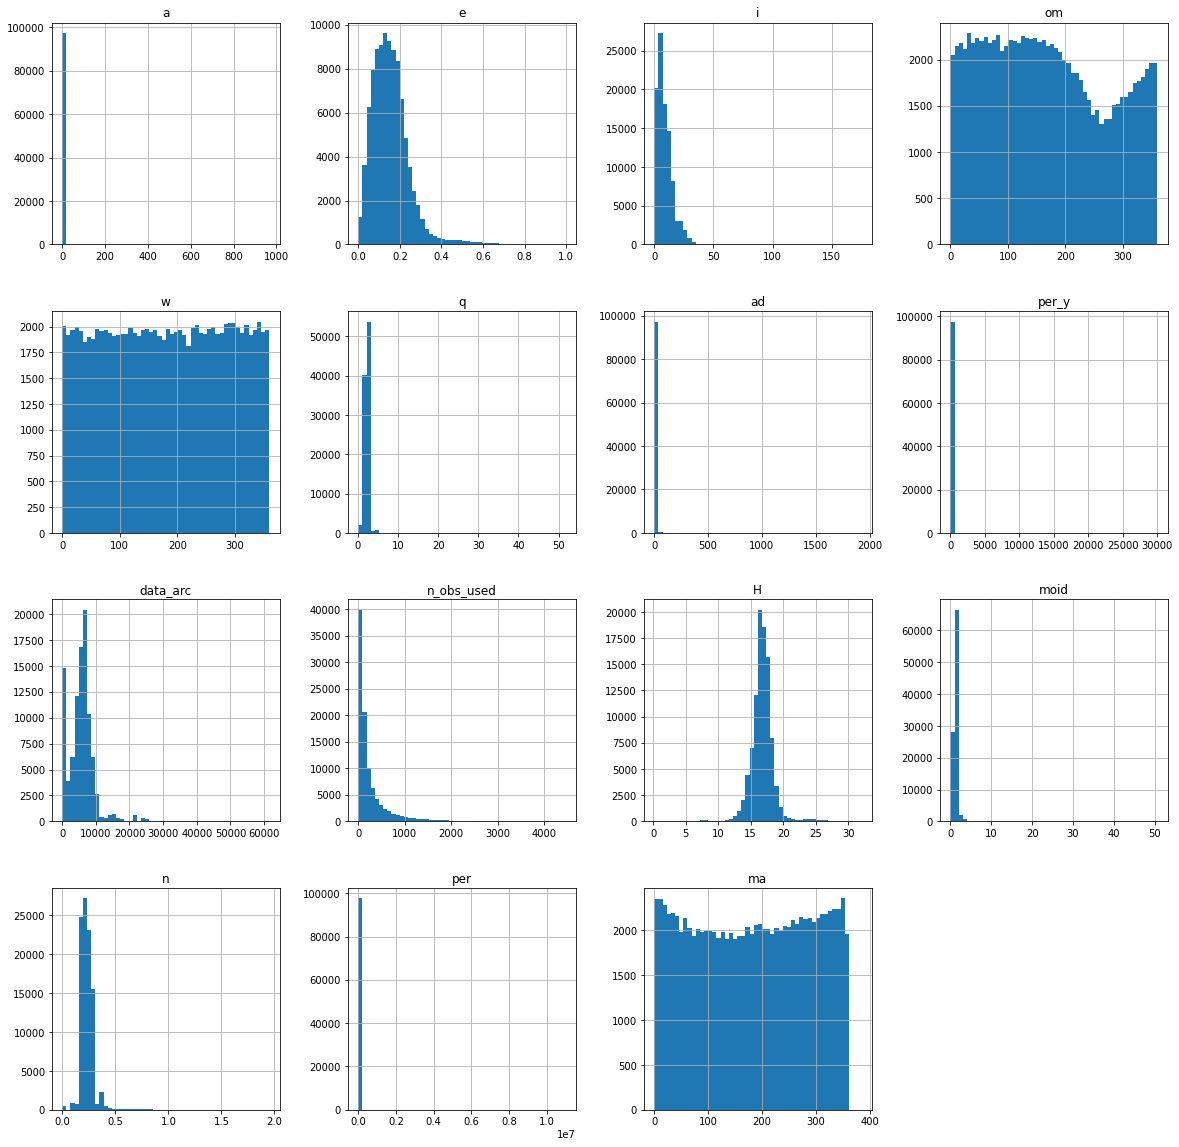

In [15]:
df.hist(bins = 50, figsize = (20,20))

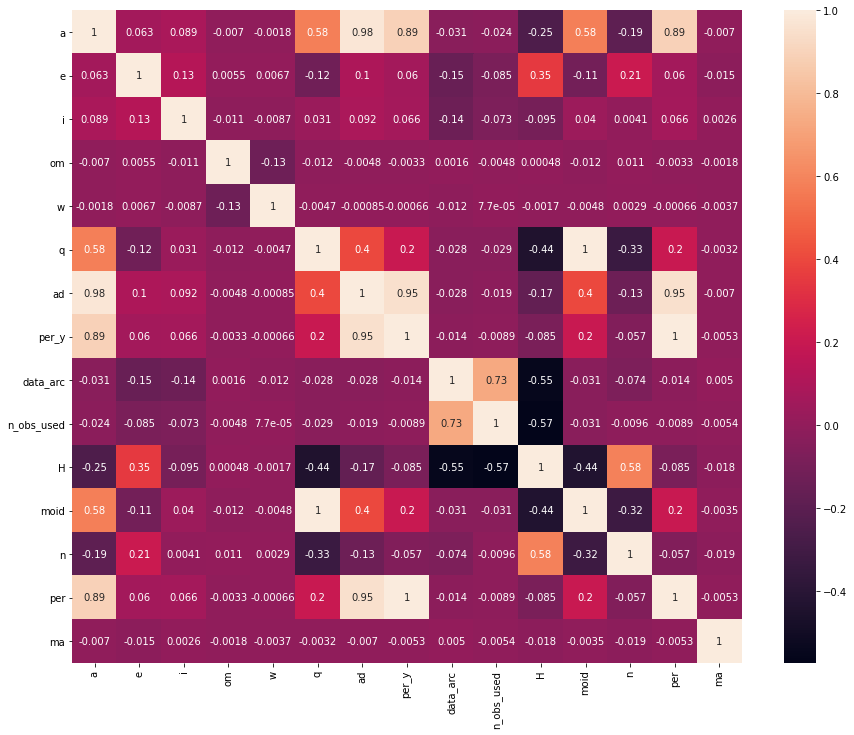

In [16]:
import seaborn as sns
#dataset.info()
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_data = df.select_dtypes(include=numerics)
#num_data.info()
plt.subplots(figsize=(15,12))
sns.heatmap(num_data.corr(),annot=True,annot_kws={'size':10})
#num_data.corr()

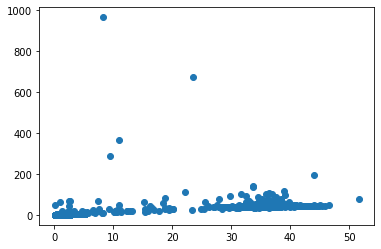

In [30]:
#plot between eccentricity and Semi Major axis
plt.scatter(df['q'], df['a'])

In [20]:

df = df.drop(['neo','pha', 'class'],axis=1)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97701 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   a               97701 non-null  float64
 1   e               97701 non-null  float64
 2   i               97701 non-null  float64
 3   om              97701 non-null  float64
 4   w               97701 non-null  float64
 5   q               97701 non-null  float64
 6   ad              97701 non-null  float64
 7   per_y           97701 non-null  float64
 8   data_arc        97701 non-null  float64
 9   condition_code  97701 non-null  object 
 10  n_obs_used      97701 non-null  int64  
 11  H               97701 non-null  float64
 12  moid            97701 non-null  float64
 13  n               97701 non-null  float64
 14  per             97701 non-null  float64
 15  ma              97701 non-null  float64
dtypes: float64(14), int64(1), object(1)
memory usage: 12.7+ MB


In [23]:
#Find the clusters based on 
X = df.iloc[:, [5,0]].values
X

array([[2.15485753, 2.58556731],
       [2.00869005, 2.62568343],
       [2.7449566 , 3.13617131],
       ...,
       [0.41378693, 1.92741293],
       [0.86571676, 0.96895674],
       [1.85848746, 2.32457807]])

## Clustering using K-Means(Scikit)

In [24]:
from sklearn.cluster import KMeans
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

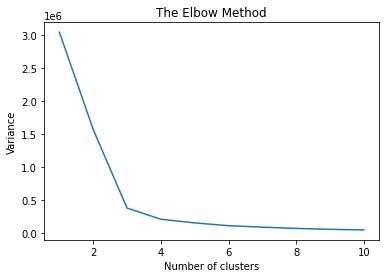

In [25]:
from sklearn.cluster import KMeans
# Within-Cluster-Sum-of-Squares 
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Variance')
plt.show()

In [26]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

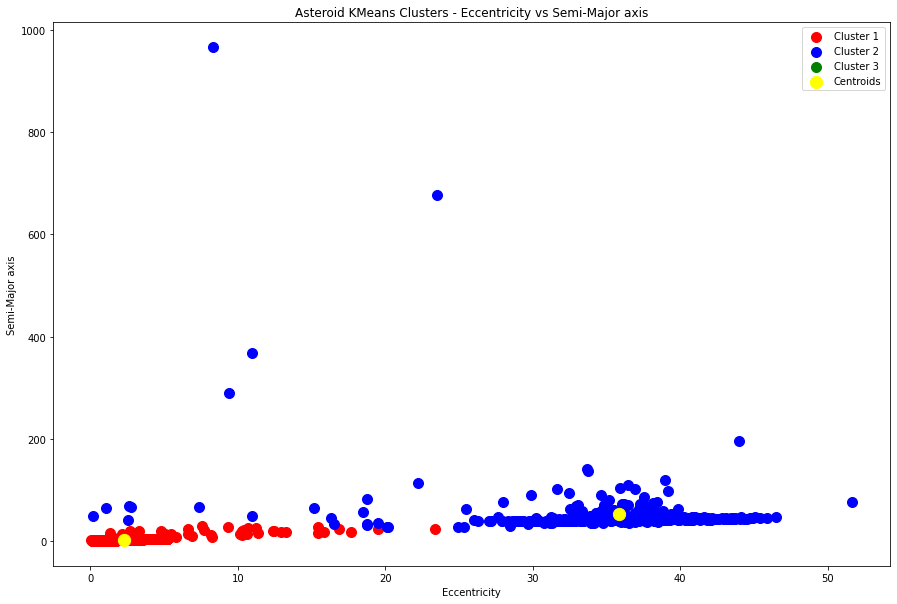

In [31]:
#3 clusters
plt.figure(figsize=(15,10))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
#plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
#plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 150, c = 'yellow', label = 'Centroids')
plt.title('Asteroid KMeans Clusters - Eccentricity vs Semi-Major axis')
plt.ylabel('Semi-Major axis')
plt.xlabel('Eccentricity')
plt.legend()
plt.show()

In [34]:
#4 clusters
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

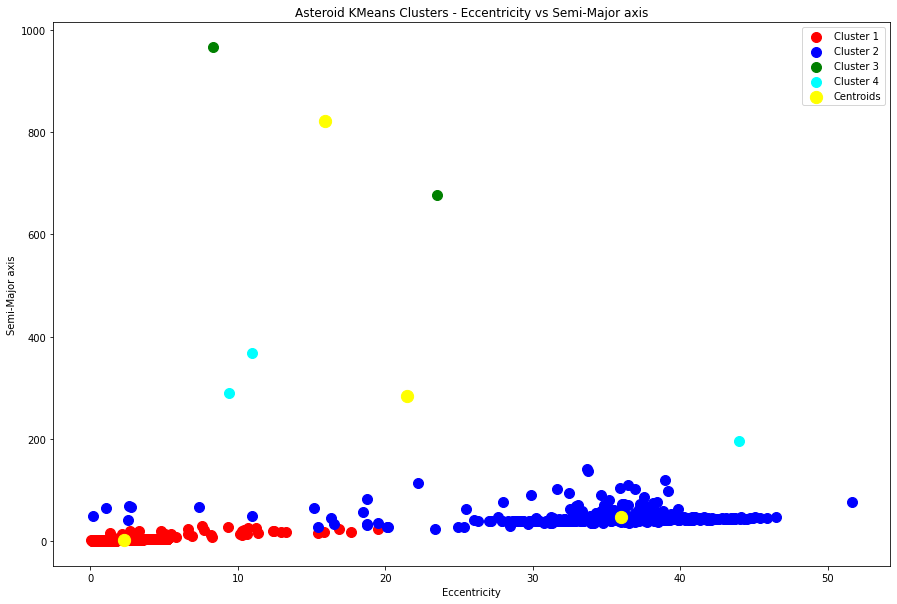

In [35]:
plt.figure(figsize=(15,10))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 150, c = 'yellow', label = 'Centroids')
plt.title('Asteroid KMeans Clusters - Eccentricity vs Semi-Major axis')
plt.ylabel('Semi-Major axis')
plt.xlabel('Eccentricity')
plt.legend()
plt.show()

## K-Means using Pytorch

In [36]:
!pip install kmeans-pytorch

In [37]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from kmeans_pytorch import kmeans, kmeans_predict

In [40]:
# data, 3 clusters
data_size, dims, num_clusters = X, 2, 3
x = torch.from_numpy(X)

In [41]:
# k-means
cluster_ids_x, cluster_centers = kmeans(X=x, num_clusters=num_clusters, distance='euclidean')

[running kmeans]: 3it [00:00, 21.44it/s, center_shift=1343.368896, iteration=4, tol=0.000100]

running k-means on cpu..


[running kmeans]: 10it [00:00, 21.78it/s, center_shift=0.000061, iteration=10, tol=0.000100]


In [42]:
# cluster IDs and cluster centers
print(cluster_ids_x)
print(cluster_centers)

tensor([1, 1, 2,  ..., 1, 1, 1])
tensor([[35.8295, 53.1716],
        [ 1.9706,  2.4150],
        [ 2.6965,  3.0601]])


In [43]:
# more data
y = np.random.randn(3, dims) / 6
y_kmeans = torch.from_numpy(y)
# predict cluster ids for y
cluster_ids_y = kmeans_predict(
    y_kmeans, cluster_centers, 'euclidean'
)
print(cluster_ids_y)

predicting on cpu..
tensor([1, 1, 1])


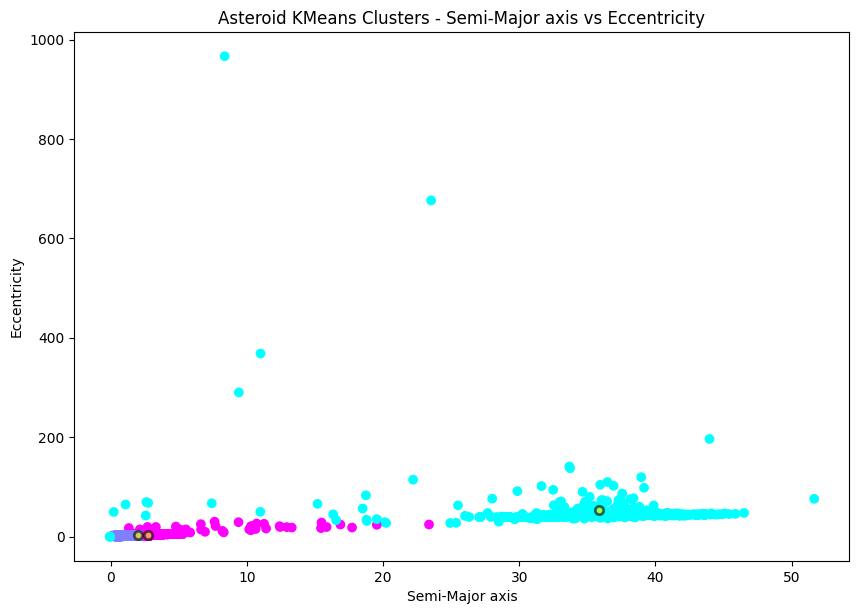

In [44]:
# plot
plt.figure(figsize=(10, 7), dpi=100)
plt.scatter(x[:, 0], x[:, 1], c=cluster_ids_x, cmap='cool')
plt.scatter(y[:, 0], y[:, 1], c=cluster_ids_y, cmap='cool')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='yellow', alpha=0.6, edgecolors='black', linewidths=2)
plt.title('Asteroid KMeans Clusters - Semi-Major axis vs Eccentricity')
plt.ylabel('Semi-Major axis')
plt.xlabel('Eccentricity')
plt.show()